# 1. State Problem

### 1.1 Problem and pain point

คนที่มีภาวะตาบอดสีแดง–เขียว (Red-Green Color Blindness) มักจะเจอปัญหาเวลาต้องแยกสีของผักผลไม้ โดยเฉพาะพริกหวานที่มีทั้ง แดง เขียว เหลือง ซึ่งสีเขียวกับสีแดงนั้นมักจะมองคล้ายกัน ทำให้เวลาไปซื้อของที่ตลาด อาจจะเลือกผิดหยิบเอาพริกแดงแทนที่จะหยิบเขียวหรือเวลาทำอาหารที่ต้องทำตามสูตรที่ใส่พริกแดงเพื่อสีสันแต่กลับใส่พริกเขียว ทำให้รสชาติและหน้าตาอาหารไม่ตรงกับที่ตั้งใจ และถ้าเป็นงานเกี่ยวกับร้านอาหารหรือโรงแรม การคัดพริกผิดสีอาจทำให้อาหารไม่สวยงาม ไม่ได้มาตรฐาน ดังนั้น กลุ่มของเราจึงพัฒนาโครงงาน Yaek Zaab ขึ้นมา โดยมีวัตถุประสงค์เพื่อสร้างผู้ช่วยสำหรับคนตาบอดสีให้สามารถมั่นใจว่าหยิบหรือซื้อพริกได้ถูกสี ทำให้ทำอาหารได้อย่างมั่นใจและรู้สึกเท่าเทียมกับคนทั่วไป ด้วยการนำเทคโนโลยี AI และ Deep learning มาช่วยคนตาบอดสีแยกสีของพริกหวาน

### 1.2 Related work

- https://www.mdpi.com/2077-0472/14/3/331

  จากงานวิจัย "Maturity Recognition and Fruit Counting for Sweet Peppers in Greenhouses Using Deep Learning Neural Networks" (2024) เป็นงานวิจัยที่ทำมาเพื่อแก้ปัญหาการจำแนกความสุกและการนับจำนวนพริกหวานในโรงเรือน ผู้วิจัยเลือกใช้โมเดล YOLOv5 มาช่วยตรวจจับและจำแนกว่าพริกอยู่ในระยะไหนของการสุก และใช้ DeepSORT มาช่วยติดตามและนับจำนวนผลพริกในภาพหรือวิดีโอ ข้อมูลที่ใช้มาจากภาพถ่ายพริกประมาณ 1,800 ภาพในสภาพแวดล้อมจริงในโรงเรือน ผลลัพธ์ออกมาได้ค่า mAP@0.5(Mean Average Precision) ประมาณ 80.3%

- จุดเด่นของงานวิจัยนี้คือ การรวมทั้งการจำแนกกับการติดตามเข้าด้วยกัน ทำให้ระบบทำงานได้ค่อนข้างครบแต่ก็ยังมีข้อจำกัด เช่น เวลาพริกอยู่ในช่วงสุกกลาง ๆ โมเดลยังสับสนว่าพริกอยู่ขั้นไหน รวมถึงปัญหาเรื่องแสงหรือใบไม้บังผลก็ทำให้ผลลัพธ์ไม่แม่นยำเท่าที่ควร

- Research Gap : งานวิจัยนี้ยังไม่ได้โฟกัสไปที่การจำแนกสีหลักของพริก(เขียว เหลือง แดง)หรือการแยกว่าพริกผลไหนเริ่มเน่าเสีย ซึ่งจุดนี้เป็นเรื่องสำคัญในมุมการบริโภค และผลลัพธ์ออกมาได้ค่า mAP@0.5(Mean Average Precision) ประมาณ 80.3% จุดนี้จึงสามารถต่อยอดมาสู่การทำ AI ที่จำแนกพริกหวาน 3 สีและพริกเน่า ซึ่งประสิทธิภาพที่ดีของโมเดลมาจาก 3 ส่วนสำคัญ คือ การจัดการข้อมูลภาพให้มีความหลากหลายมากขึ้น การปรับโครงสร้างของโมเดล CNN ใหม่ และการนำ Framwork TensorFlow มาใช้ และเพิ่มฟังก์ชันการใช้งานที่เข้าถึงได้สำหรับคนตาบอดสี เช่น การทำ UI ที่ไม่ได้ใช้แค่สีแต่มีข้อความหรือไอคอนบอกด้วย เพื่อให้ใช้งานง่ายกับทุกคน

### 1.3 Unique method

- สามารถแยกสีของพริกหวานได้ accuracy มากที่สุด 97.43%
- Website เรามีการออกแบบหน้า UI มาเพื่อ color blind friendly
- Website มีการแสดงผล Dashboard ประวัติการวิเคราะห์สีของพริกหวานของผู้ใช้งานแต่ละคนผ่านการเรียกใช้ local storage

# 2.Data Preparation

### 2.1 Data source

สมาชิกทุกคนในกลุ่มตั้งใจลงมือถ่ายภาพพริกหวานด้วยตนเอง เพื่อให้ได้ Dataset ที่ตรงตามความต้องการ โดยกำหนดให้เป็นภาพจัตุรัสขนาด 1:1 มีพื้นหลังสีขาวและในรูปมีพริกหวานเพียง 1 ลูกเท่านั้น

### 2.2 Data Transformation

เนื่องจากเป็นการถ่ายจากภาพจากโทรศัพท์มือถือ ทำให้รูปภาพมีนามสกุลไฟล์ต่างกัน บางภาพเป็น .HEIC จึงต้องนำมาแปลงนามสกุลไฟล์ให้เป็น .jpg ทั้งหมด

### 2.3 Insight of dataset

- ทำไมต้องเป็นพริกหวาน --> เนื่องจากพริกหวานเป็นพืชที่สร้างรายได้เป็นอันดับ 1 ของเกษตรกรบนดอย มีปริมาณการส่งมอบผลผลิตอยู่ที่ 2,504,311 กิโลกรัม มีมูลค่าสูงถึง 110,641,624 บาท (สถาบันวิจัยและพัฒนาพื้นที่สูง, 2565)

### Library version
- Python 3.13.5
- Numpy 2.1.3
- OpenCV 4.12.0
- Matplotlib 3.10.0
- Tensorflow 2.20.0
- Scikit-learn 1.6.1

In [1]:
import numpy as np
import cv2
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Tensorflow สำหรับการสร้างโมเดล
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

# Data manipulation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
!python --version
print("\nNumpy " + np.__version__)
print("OpenCV " + cv2.__version__)
print("Matplotlib " + matplotlib.__version__)
print("Tensorflow " + tf.__version__)
print("Scikit-learn " + sklearn.__version__)

Python 3.13.5

Numpy 2.1.3
OpenCV 4.12.0
Matplotlib 3.10.0
Tensorflow 2.20.0
Scikit-learn 1.6.1


In [3]:
# Set ขนาดรูปภาพ
img_height = 224
img_width = 224

# 3. Train

### 3.1 AI Model Convolutional Neural Network (CNN)
- การวิเคราะห์ข้อมูลภาพมีความสำคัญอย่างมาก เนื่องจากโมเดล CNN ถูกออกแบบมาให้เหมาะสมกับการประมวลผลภาพโดยเฉพาะ โดยสามารถเรียนรู้ลักษณะเฉพาะของภาพ (Feature Extraction) ได้โดยอัตโนมัติ เช่น การตรวจจับขอบ รูปร่าง หรือรายละเอียดเชิงลึก โดยไม่จำเป็นต้องระบุลักษณะเหล่านี้ด้วยตนเอง
- โครงสร้างหลายเลเยอร์ของ CNN ได้รับแรงบันดาลใจจากการทำงานของระบบประสาทของสมองมนุษย์ โดยแต่ละเลเยอร์จะเรียนรู้คุณลักษณะในระดับที่ซับซ้อนขึ้น เริ่มจากลักษณะทั่วไป เช่น เส้นหรือขอบ จนถึงลักษณะเชิงลึกและเฉพาะเจาะจงมากขึ้น การจัดระเบียบลำดับชั้นนี้ช่วยให้โมเดลเข้าใจและวิเคราะห์ข้อมูลภาพได้อย่างมีประสิทธิภาพ
- ด้วยความสามารถด้านการเรียนรู้เชิงลึก (Deep Learning) ทำให้ CNN เหมาะสมสำหรับการใช้งานในปัญหาที่ซับซ้อน เนื่องจากสามารถสร้างความสัมพันธ์ระหว่างพิกเซลในภาพได้อย่างมีประสิทธิภาพ จึงถูกนำมาใช้แก้ปัญหาหลากหลายด้านที่เกี่ยวข้องกับการวิเคราะห์ภาพ
- การลดความซับซ้อนของเครือข่าย (Parameter Sharing) ใน CNN หมายถึงการที่ตัวกรอง (Filters) หรือพารามิเตอร์ชุดเดียวกันถูกนำไปใช้กับทั้งภาพ ซึ่งทำให้จำนวนพารามิเตอร์ที่ต้องเรียนรู้ลดลงเมื่อเทียบกับ Fully Connected Network ส่งผลให้โมเดลทำงานได้เร็วขึ้นและใช้ทรัพยากรคำนวณน้อยลง
### 3.2 Hyperparameters
- batch size = 16 ช่วยให้การฝึกโมเดลทำงานได้เร็ว เนื่องจากมีการอัปเดตค่าน้ำหนัก (weight) บ่อยครั้ง และยังช่วยลดการใช้หน่วยความจำระหว่างประมวลผล
- epoch = 50 กำหนดจำนวนรอบการฝึก เพื่อให้โมเดลได้เรียนรู้อย่างต่อเนื่อง เหมาะสำหรับกรณีที่ค่าความแม่นยำ (accuracy) ยังไม่เสถียร
- early stopping patience = 5 หากโมเดลไม่แสดงการพัฒนาในช่วง 5 epoch ติดต่อกัน ระบบจะหยุดเทรนโดยอัตโนมัติ

In [4]:
# กำหนดค่า hyperparameters
batch_size = 16
epochs = 50

### 3.3 Model Training
- อัตราส่วนข้อมูล train : test = 70 : 30, seed=123

In [5]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "bell_pepper_split/train",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True, # สลับภาพ
    seed=123
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "bell_pepper_split/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

class_names = train_dataset.class_names
print("Classes:", class_names)

num_classes = len(class_names)

Found 2802 files belonging to 4 classes.
Found 1204 files belonging to 4 classes.
Classes: ['green', 'red', 'rotten', 'yellow']


In [6]:
# ฟังก์ชันแปลงค่า pixel ของภาพจาก uint8 (0-255) เป็น float32 (0-1) เพื่อให้เรียนรู้ได้เร็วและเสถียรขึ้น
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

# เร่งความเร็วในการโหลดข้อมูลด้วย cache + prefetch
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.map(convert_to_float)
val_dataset = val_dataset.map(convert_to_float)

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### สร้างโมเดล Convolution Neural Network (CNN)

In [7]:
from tensorflow.keras import layers, Sequential
model = tf.keras.Sequential([
    layers.Input(shape=[img_height, img_width, 3]),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

### ตรวจสอบโมเดล Convolutional Neural Network (CNN)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,855,844 (49.04 MB)

 Trainable params: 12,855,844 (49.04 MB)

 Non-trainable params: 0 (0.00 B)

### กำหนด earlystopping ถ้าโมเดลไม่มีการพัฒนาให้หยุดเทรนโดยอัตโนมัติ

In [9]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",   # ดูค่าความแม่นยำ validation
    patience=5, 
    restore_best_weights=True
)

### ตั้งค่า parameter ที่สำคัญ
- optimizer adam กำหนดอัตราการเรียนรู้ (learning rate) เท่ากับ 0.001
- SparseCategoricalCrossentropy ใช้เป็นฟังก์ชัน loss ที่เหมาะสำหรับการจัดประเภทหลายคลาส (multi-class classification) โดยค่าป้ายกำกับ (label) อยู่ในรูปตัวเลข
- แสดงผล metric ความแม่นยำ (accuracy) หลังจากการฝึกแต่ละ epoch เพื่อประเมินประสิทธิภาพของโมเดลอย่างต่อเนื่อง

In [10]:
# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### เทรนโมเดล

In [11]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 97s 535ms/step - accuracy: 0.7641 - loss: 0.7754 - val_accuracy: 0.8920 - val_loss: 0.2870
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 265ms/step - accuracy: 0.9033 - loss: 0.2533 - val_accuracy: 0.9261 - val_loss: 0.2000
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - accuracy: 0.9443 - loss: 0.1464 - val_accuracy: 0.9510 - val_loss: 0.1360
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 263ms/step - accuracy: 0.9743 - loss: 0.0707 - val_accuracy: 0.9319 - val_loss: 0.1752
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 267ms/step - accuracy: 0.9797 - loss: 0.0587 - val_accuracy: 0.9601 - val_loss: 0.1288
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 81s 262ms/step - accuracy: 0.9836 - loss: 0.0453 - val_accuracy: 0.9493 - val_loss: 0.1972
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 267ms/step - accuracy: 0.9904 - loss: 0.0316 - val_accuracy: 0.9294 - val_loss: 0.2693
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 47s 268ms/step - accuracy: 0.9946 - loss: 0

In [12]:
# ดู accuracy แต่ละรอบ
print(history.history['accuracy'])

[0.7640970945358276, 0.9032833576202393, 0.9443255066871643, 0.9743040800094604, 0.9796574115753174, 0.9835831522941589, 0.9903640151023865, 0.9946466684341431, 0.9921484589576721, 0.9746609330177307]


### เก็บโมเดลที่เทรนแล้วไว้ในไฟล์ชื่อ bellpepper_model.h5

In [13]:
model.save('bellpepper_model.h5')

### สำหรับ import model

In [14]:
model = load_model('bellpepper_model.h5')

# 4. Test

### 4.1 การประเมินผล
การวัดประสิทธิภาพของโมเดลทำได้จากค่าต่าง ๆ ดังนี้
- Accuracy วัดสัดส่วนของการทำนายที่ถูกต้องเมื่อเปรียบเทียบกับจำนวนตัวอย่างทั้งหมด
- Precision วัดสัดส่วนของตัวอย่างที่โมเดลทำนายว่าเป็นบวกและถูกต้องจริง เมื่อเทียบกับจำนวนตัวอย่างทั้งหมดที่ถูกทำนายว่าเป็นบวก
- Recall วัดสัดส่วนของตัวอย่างที่เป็นบวกจริงและถูกโมเดลทำนายถูกต้อง เมื่อเทียบกับจำนวนตัวอย่างที่เป็นบวกจริงทั้งหมด
- F1-score ค่าที่ได้จากการหาค่าเฉลี่ยแบบถ่วงน้ำหนักระหว่าง Precision และ Recall โดยเน้นความสมดุลระหว่างสองค่า เพื่อสะท้อนประสิทธิภาพของโมเดลได้รอบด้านมากขึ้น
### 4.2 การอธิบายผลลัพธ์
- Accuracy = 0.96
- Precision = 0.96
- Recall = 0.96
- F1-score = 0.96

### แสดงผล score ต่าง ๆ ด้วยคำสั่ง classification_report

In [15]:
# Predicted validation set
predictions = model.predict(val_dataset)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in val_dataset], axis=0)

# สร้าง Classification report ประกอบไปด้วย precision, recall, และ F1-score
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step
              precision    recall  f1-score   support

       green       0.96      0.98      0.97       310
         red       0.99      0.99      0.99       325
      rotten       0.95      0.85      0.90       247
      yellow       0.94      0.99      0.96       322

    accuracy                           0.96      1204
   macro avg       0.96      0.95      0.96      1204
weighted avg       0.96      0.96      0.96      1204



### ค่า accuracy ที่ได้

In [16]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9601 - loss: 0.1288
Test Loss: 0.1288, Test Accuracy: 0.9601


### กราฟ loss rate และ accuracy rate

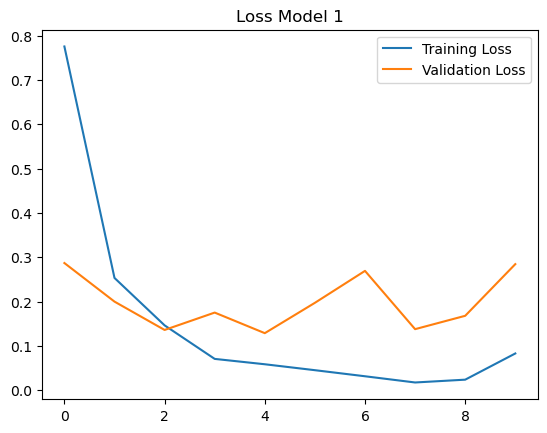

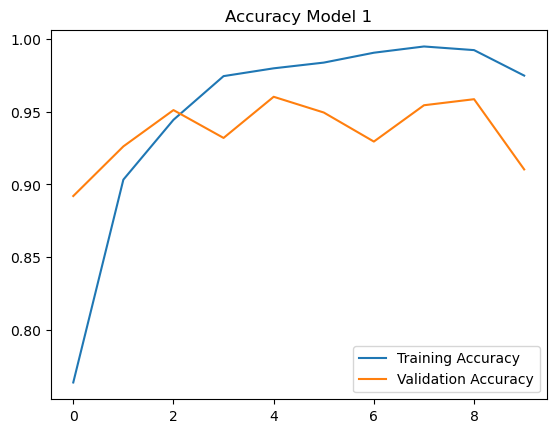

In [17]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss and Accuracy
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Model 1')
plt.legend()

plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Model 1')
plt.legend()

plt.show()

### Confusion Matrix
การประเมินผลโมเดล classification โดยแสดงผลการคาดการณ์ของโมเดลเมื่อเปรียบเทียบกับค่าจริงในรูปแบบตาราง ซึ่งช่วยให้มองเห็นประสิทธิภาพการทำงานของโมเดลได้อย่างชัดเจนและเข้าใจง่ายมากขึ้น

<Figure size 1200x1000 with 0 Axes>

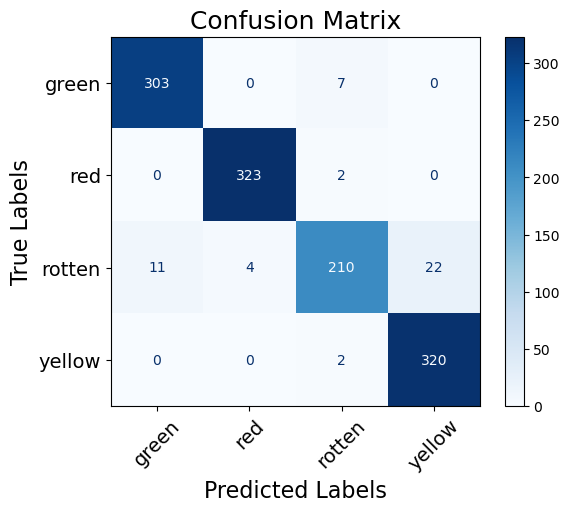

In [18]:
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# 5. Model Improvement

### 5.1 การวิเคราะห์ข้อบกพร่องของโมเดล
จากกราฟ Loss และ Accuracy ที่ได้ จะสังเกตได้ว่าโมเดลมีแนวโน้มในการเรียนรู้ที่ดี แต่ยังคงมีค่า Validation Loss ที่มีความแกว่งขึ้นลงอยู่บ้าง ซึ่งมีความเป็นไปได้ที่จะเกิด overfitting ขึ้นได้ และจาก Confusion Matrix พบว่าพริกหวานสีเขียว สีแดง และสีเหลืองสามารถทำนายได้ค่อนข้างแม่นยำ แต่สำหรับพริกหวานเน่าเสีย ยังคงมีความสับสนและมีโอกาสถูกทำนายผิดได้

เมื่อทดสอบด้วยการนำภาพพริกหวานหรือข้อมูลใหม่ที่ไม่เคยใช้ในการเทรนโมเดลมาทดสอบบนเว็บไซต์ พบว่าสามารถทำนายได้ถูกต้องเพียงบางภาพเท่านั้น แสดงให้เห็นว่ายังขาดความแม่นยำในการทำนาย ซึ่งคาดว่าสาเหตุอาจเกิดมาจากปัญหาในการเทรนโมเดล เช่น การเกิด overfitting หรือการเรียนรู้ของโมเดลที่ยังไม่เพียงพอ

และเมื่อทดสอบด้วยรูปภาพอื่นที่ไม่ใช่พริกหวาน หรือมีพริกหวานในรูปภาพมากกว่า 1 ลูก พบว่าโมเดลยังแสดงผลการทำนายคลาดเคลื่อน เนื่องจากไม่มีการจัดการดักจับข้อมูลที่ไม่เกี่ยวข้องไว้

### 5.2 การปรับปรุงโมเดล

- เพิ่ม class 'unknown' ใน dataset เพื่อทำการดักจับรูปภาพที่ไม่ใช่พริกหวาน หรือมีพริกหวานในรูปภาพมากกว่า 1 ลูก
- ปรับค่า Batch size เพื่อให้โมเดล train เร็วขึ้น และ gradient ที่ได้เสถียรมากขึ้น

In [4]:
# ปรับค่า hyperparameters
batch_size2 = 32 # เปลี่ยนจาก 16 เป็น 32 เพื่อให้โมเดล train เร็วขึ้น และ gradient ที่ได้เสถียรมากขึ้น
epochs = 50

### Train : Test = 70 : 30

In [5]:
train_dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "bell_pepper_split/train",
    image_size=(img_height, img_width),
    batch_size=batch_size2,
    shuffle=True, # สลับภาพ
    seed=123
)

val_dataset2 = tf.keras.preprocessing.image_dataset_from_directory(
    "bell_pepper_split/test",
    image_size=(img_height, img_width),
    batch_size=batch_size2,
    shuffle=False
)

class_names2 = train_dataset2.class_names
print("Classes:", class_names2)

num_classes2 = len(class_names2)

Found 3502 files belonging to 5 classes.
Found 1504 files belonging to 5 classes.
Classes: ['green', 'red', 'rotten', 'unknown', 'yellow']


In [6]:
# ฟังก์ชันแปลงค่า pixel ของภาพจาก uint8 (0-255) เป็น float32 (0-1) เพื่อให้เรียนรู้ได้เร็วและเสถียรขึ้น
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

# เร่งความเร็วในการโหลดข้อมูลด้วย cache + prefetch
AUTOTUNE = tf.data.AUTOTUNE

train_dataset2 = train_dataset2.map(convert_to_float)
val_dataset2 = val_dataset2.map(convert_to_float)

train_dataset2 = train_dataset2.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset2 = val_dataset2.cache().prefetch(buffer_size=AUTOTUNE)

### สร้างโมเดล Convolutional Neural Network (CNN)

- ปรับค่าจำนวน filters ที่ใช้ใน Block ที่ 2 เพื่อเพิ่มความสามารถของโมเดลในการมองเห็นและการเรียนรู้ feature ของภาพ
- Set dropout rate เพื่อป้องกันการเกิด overfitting

In [7]:
model2 = tf.keras.Sequential([
    layers.Input(shape=[img_height, img_width, 3]),
    layers.Rescaling(1./255),
    
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, activation='relu', padding='same'), # ปรับจาก 32 เป็น 64 เพื่อเพิ่มความสามารถของโมเดลในการมองเห็นและการเรียนรู้ feature ของภาพ
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4), # Set dropout rate เพื่อป้องกันการเกิด overfit
    layers.Dense(num_classes2, activation='softmax')
])

### ตรวจสอบโมเดล Convolutional Neural Network (CNN)

In [8]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,710,277 (98.08 MB)

 Trainable params: 25,710,277 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

- เพิ่ม Callback ReduceLROnPlateau ซึ่งเป็นตัวช่วยลด learning rate อัตโนมัติเมื่อ validation loss ไม่ดีขึ้นตามค่าที่กำหนด เพื่อให้โมเดลสามารถเรียนรู้ได้ต่อเนื่องและละเอียดขึ้น

In [9]:
callbacks = [
    tf.keras.callbacks.EarlyStopping( # ดูค่าความแม่นยำ validation
        monitor="val_accuracy", patience=5, restore_best_weights=True
    ), 
    tf.keras.callbacks.ReduceLROnPlateau( # ลดค่า learning rate อัตโนมัติ ถ้า val_loss ไม่ดีขึ้น
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
    )
]

- ปรับ learning rate ของ Adam optimizer ให้โมเดลเรียนรู้ได้ดีขึ้น

In [10]:
# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) # ปรับ learning rate ให้เรียนรู้ได้ดีขึ้น
model2.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### เทรนโมเดลทีได้รับการปรับปรุง

In [11]:
history2 = model2.fit(
    train_dataset2,
    validation_data=val_dataset2,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.6413 - loss: 0.9774 - val_accuracy: 0.8677 - val_loss: 0.4992 - learning_rate: 1.0000e-04
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 147s 846ms/step - accuracy: 0.8192 - loss: 0.5138 - val_accuracy: 0.9049 - val_loss: 0.3229 - learning_rate: 1.0000e-04
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 93s 850ms/step - accuracy: 0.8669 - loss: 0.4008 - val_accuracy: 0.8983 - val_loss: 0.2871 - learning_rate: 1.0000e-04
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 95s 863ms/step - accuracy: 0.8866 - loss: 0.3214 - val_accuracy: 0.9289 - val_loss: 0.2350 - learning_rate: 1.0000e-04
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 97s 881ms/step - accuracy: 0.9061 - loss: 0.2693 - val_accuracy: 0.9335 - val_loss: 0.2204 - learning_rate: 1.0000e-04
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 133s 796ms/step - accuracy: 0.9229 - loss: 0.2335 - val_accuracy: 0.9402 - val_loss: 0.1848 - learning_rate: 1.0000e-04
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 145s 8

### เก็บโมเดลที่ได้รับการปรับปรุงใหม่ไว้ในไฟล์ชื่อ bellpepper_finalmodel_v2.h5

In [12]:
model2.save('bellpepper_finalmodel_v2.h5')

### สำหรับ import model2

In [13]:
model2 = load_model('bellpepper_finalmodel_v2.h5')

### แสดงผล score ของโมเดลที่ได้รับการปรับปรุง

In [17]:
# Predicted validation set
predictions2 = model2.predict(val_dataset2)
predicted_labels2 = np.argmax(predictions2, axis=1)

true_labels2 = np.concatenate([y for x, y in val_dataset2], axis=0)

# สร้าง Classification report ประกอบไปด้วย precision, recall, และ F1-score
report2 = classification_report(true_labels2, predicted_labels2, target_names=class_names2)
print(report2)

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step
              precision    recall  f1-score   support

       green       0.97      0.99      0.98       310
         red       0.98      0.99      0.99       325
      rotten       0.97      0.89      0.93       247
     unknown       0.96      0.98      0.97       300
      yellow       0.98      1.00      0.99       322

    accuracy                           0.97      1504
   macro avg       0.97      0.97      0.97      1504
weighted avg       0.97      0.97      0.97      1504



### ค่า accuracy ของโมเดลที่ได้รับการปรับปรุง

In [19]:
loss, accuracy = model2.evaluate(val_dataset2)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9747 - loss: 0.1234
Test Loss: 0.1234, Test Accuracy: 0.9747


### กราฟ loss rate และ accuracy rate ของโมเดลที่ได้รับการปรับปรุง

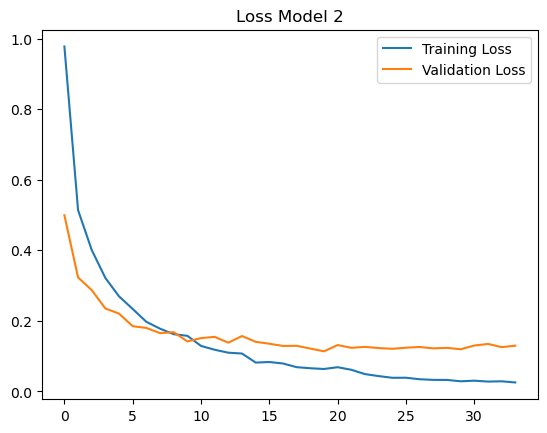

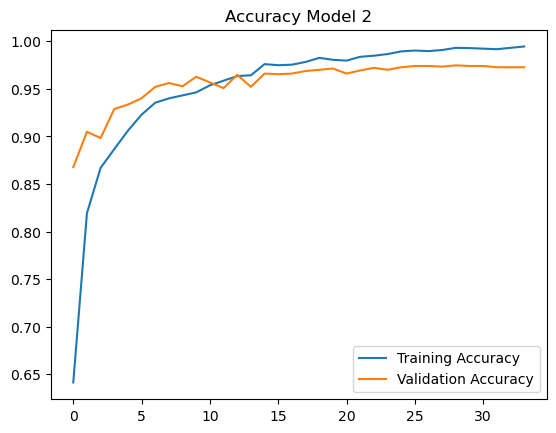

In [20]:
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
train_acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

# Plot Loss and Accuracy
plt.figure()
plt.plot(train_loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.title('Loss Model 2')
plt.legend()

plt.figure()
plt.plot(train_acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.title('Accuracy Model 2')
plt.legend()

plt.show()

### Confusion matrix ของโมเดลที่ได้รับการปรับปรุง

<Figure size 1200x1000 with 0 Axes>

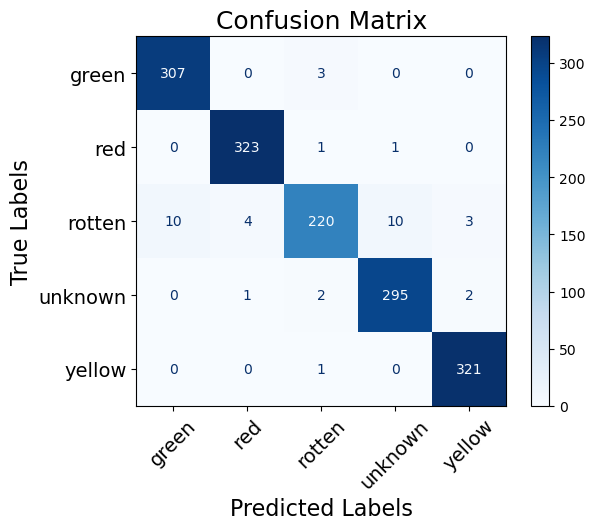

In [21]:
cm = confusion_matrix(true_labels2, predicted_labels2)

plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names2)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### 5.3 การประเมินผลหลังการปรับปรุง
- Accuracy เพิ่มขึ้นจาก 0.96 เป็น 0.97
- Precision เพิ่มขึ้นจาก 0.96 เป็น 0.97
- Recall เพิ่มขึ้นจาก 0.96 เป็น 0.97
- F1-score เพิ่มขึ้นจาก 0.96 เป็น 0.97
- โดยรวมประสิทธิภาพของโมเดลเพิ่มขึ้นโดยค่า recall ของพริกหวานเน่า (rotten) เพิ่มขึ้นจาก 0.85 เป็น 0.89